In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
dataset = pd.read_csv('IBTrACS/clean_ibtrac.csv', low_memory=False) 

In [3]:
dataset['TIMESTAMP'] = pd.to_datetime('1858-11-17', format='%Y-%m-%d') + pd.to_timedelta(dataset.TIME, unit='d')

In [4]:
dataset['MONTH'] = dataset['TIMESTAMP'].apply(lambda x: x.month)

In [5]:
dataset.head()

,CycNo,LAT,LON,TIME,YEAR,A_VMAX,VMAX,REGION,REGION2,TIMESTAMP,MONTH
0,5459,7.3,142.800003,33765.50,1951,18.358641,25.015185,False,True,1951-04-29 12:00:00,4
1,5459,7.4,142.399994,33765.75,1951,25.375734,33.225441,False,True,1951-04-29 18:00:00,4
2,5459,7.8,141.800003,33766.00,1951,32.860037,41.716022,False,True,1951-04-30 00:00:00,4
3,5459,8.2,141.099991,33766.25,1951,36.756970,46.054182,False,True,1951-04-30 06:00:00,4
4,5459,8.5,140.199997,33766.50,1951,40.748657,50.449194,False,True,1951-04-30 12:00:00,4


In [6]:
month_occur = dataset.groupby('CycNo')['MONTH'].agg(lambda x: stats.mode(x)[0][0]).reset_index()

In [7]:
month_occur.groupby('MONTH')['CycNo'].count()

MONTH
1      13
2       3
3       7
4      22
5      35
6      48
7     118
8     143
9     162
10    141
11     89
12     44
Name: CycNo, dtype: int64

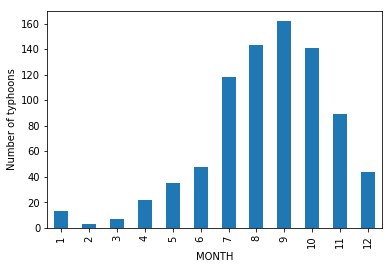

In [21]:
graph1 = month_occur.groupby('MONTH')['CycNo'].count()
graph1.plot(kind='bar')
plt.ylabel('Number of typhoons')
plt.show()

In [15]:
bins = [1, 3, 6, 9, 12]
group_names = ['Jan-March', 'April-June', 'July-Sep', 'October-December']
month_occur['categories'] = pd.cut(month_occur['MONTH'], bins, labels=group_names)

In [16]:
final = month_occur.groupby('categories')['CycNo'].count().reset_index()

In [17]:
final['percentage'] = final['CycNo']/final['CycNo'].sum()

In [18]:
final['percentage'] = final['percentage'].map('{:.1%}'.format)

In [19]:
final.columns = ['Month', 'Number of Typhoons', 'Percentage']

In [20]:
final

,Month,Number of Typhoons,Percentage
0,Jan-March,10,1.2%
1,April-June,105,12.9%
2,July-Sep,423,52.1%
3,October-December,274,33.7%
